In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
from model_selection import train_test_split
from metrics import accuracy_score
import time
from ensemble.AdaBoost import AdaBoost
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import fetch_covtype

data = fetch_covtype()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_classifier():
    accuracies = []
    trainig_times = []

    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf = AdaBoost(weak_classifier=DecisionTreeClassifier, n_classifiers=50)
        start = time.time()
        clf.fit(X_train, y_train)
        trainig_times.append(time.time() - start)
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), accuracies)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), trainig_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Time')
    plt.title('Time vs Number of samples')
    plt.show()
    


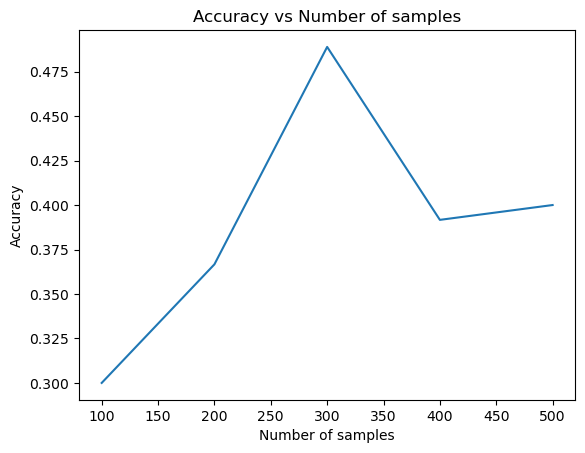

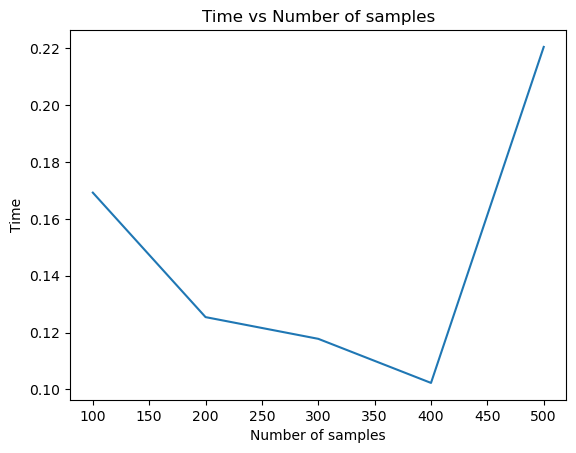

In [3]:
accuracies = []
trainig_times = []

for i in range(100, 501, 100):
    X, y = get_random_range(data, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = AdaBoost(weak_classifier=DecisionTreeClassifier, n_classifiers=50)
    start = time.time()
    clf.fit(X_train, y_train)
    trainig_times.append(time.time() - start)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(100, 501, 100), accuracies)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of samples')
plt.show()

plt.plot(range(100, 501, 100), trainig_times)
plt.xlabel('Number of samples')
plt.ylabel('Time')
plt.title('Time vs Number of samples')
plt.show()

In [ ]:
benchmark_classifier()